# Assignment for Week 8

## Final Project     

Week's 8 assignment will be work towards the final project.    

### About Final Project     


The final project will be a competition submission to any of the platforms available such as Kaggle. The competition will require to either build a Linear Regression or Logistic Regression model. 

The instructor will notify students by week 7 on the competition and the submissions.  This competition will include some or all the material and skills learned in the course.

Students are required to submit the final version of work/codes as a Jupyter Notebook via colab as submitted to the competition along with the link to their account pointing to their score on the competition's board. This will be evaluated and graded for the entire project for the duration of week 8-12. 



## Tasks

**Required:**    

*   Open an account to the decided competition's platform and download the data sets (train, test, etc) needed to compete.    
*   Start working with your data, get to know the data. Read all the competition information provided to the hosting platform. Try to get familiar with the data, topic, etc.      
*   Submit the link of your competition's account via BlueQuill. 

**Pump-it Up Water Project - Tanzanian Ministry of Water**

Competition Challenge - using data from "Taarifa" and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition.

Predict one of these three classes based on several variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which water points will fail can improve maintenance operaations and ensure that clean, potable water is available to communities across Tanzania.

A training dataset with information of nearly sixty thousand water points across Tanzania is provided its use is expected to build a model that will be able to predict which water points are functional, nonfunctional, and functional but need repair on a test dataset.

In [ ]:
# Let's load pandas and see the first few rows of data of the Pump-it Up dataset.
import pandas as pd
import os
import sys
water = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA612_FINAL_PROJECT/master/Well_Water_19K_Mod.csv')
water.head(5)



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,1,vwc,user-group,pay annually,annually,soft,good,1,enough,spring,spring,groundwater,1,communal standpipe,1
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,1,wug,user-group,never pay,never pay,soft,good,2,insufficient,rainwater harvesting,rainwater harvesting,surface,1,communal standpipe,1
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,1,vwc,user-group,pay per bucket,per bucket,soft,good,1,enough,dam,dam,surface,4,communal standpipe,1
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,5,vwc,user-group,never pay,never pay,soft,good,0,dry,machine dbh,borehole,groundwater,4,communal standpipe,0
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,1,other,other,never pay,never pay,soft,good,3,seasonal,rainwater harvesting,rainwater harvesting,surface,1,communal standpipe,1


In [ ]:
# Let's load additional pandas features
import time
import seaborn as sns
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import numpy as np
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO
from sklearn import tree
import scipy.stats as stats
import pandas.util.testing as tm
from pandas import set_option
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier

# Let's see our data types
water.info()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# Let's get rid of some columns that don't appear to be factors in determining whether or not we havea functional water source
water_drop_list = ['id', 'installer','num_private','lga','ward','extraction_type_group','extraction_type','management_group','payment','quality_group','source_type','waterpoint_type_group']
water.drop(water_drop_list, inplace=True, axis=1)
water.head(5)




,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,quantity_group,source,source_class,waterpoint_type,status_group
0,6000.0,3/14/2011,Roman,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,1,vwc,annually,soft,1,enough,spring,groundwater,1,1
1,0.0,3/6/2013,Grumeti,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,1,wug,never pay,soft,2,insufficient,rainwater harvesting,surface,1,1
2,25.0,2/25/2013,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,1,vwc,per bucket,soft,1,enough,dam,surface,4,1
3,0.0,1/28/2013,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,5,vwc,never pay,soft,0,dry,machine dbh,groundwater,4,0
4,0.0,7/13/2011,Action In A,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,1,other,never pay,soft,3,seasonal,rainwater harvesting,surface,1,1


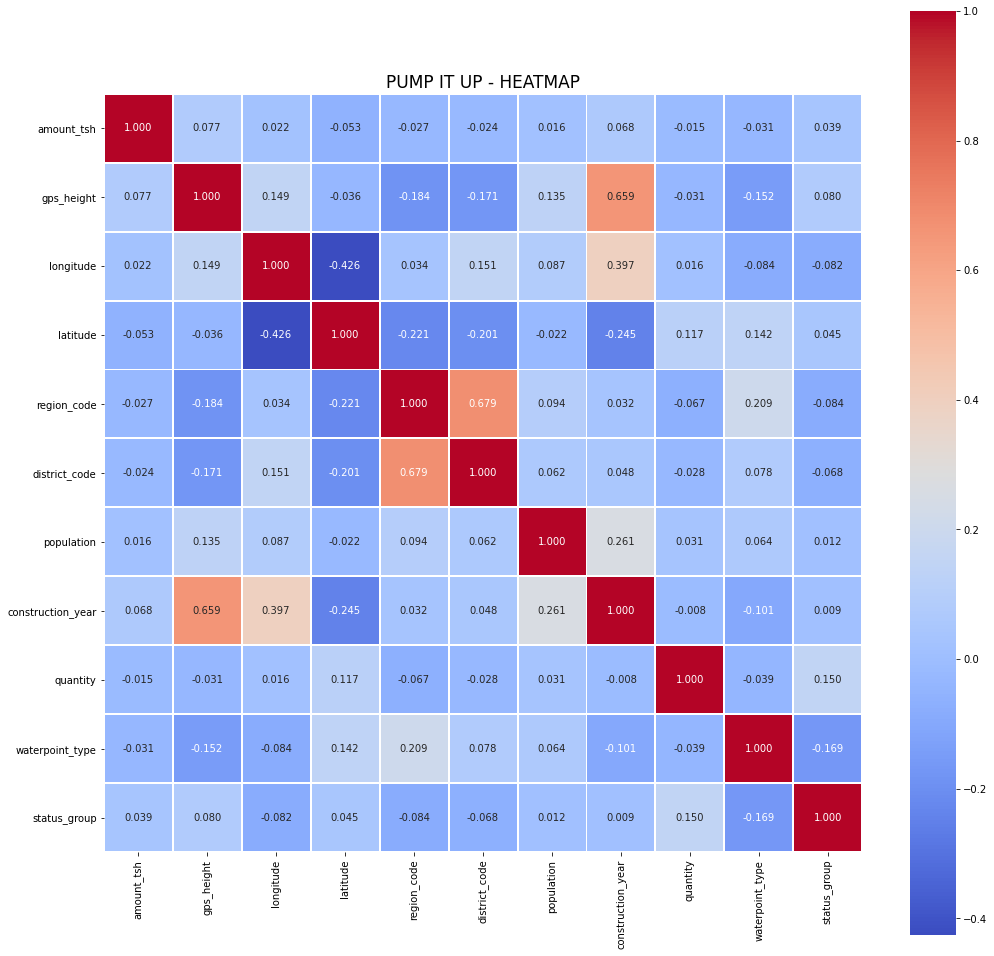

In [ ]:
# Let's do a Correlation Matrix 
corr = water.corr()
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True, 
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('PUMP IT UP - HEATMAP', size=17);



In [ ]:
# Let's create a count of Status Group values by Waterpoint Type with a Bar Chart
water_type = water.groupby('waterpoint_type')[['status_group']].count()
print(water_type)



                 status_group
waterpoint_type              
0                         116
1                       28522
2                       17488
3                        6380
4                        6103
5                         784
7                           7


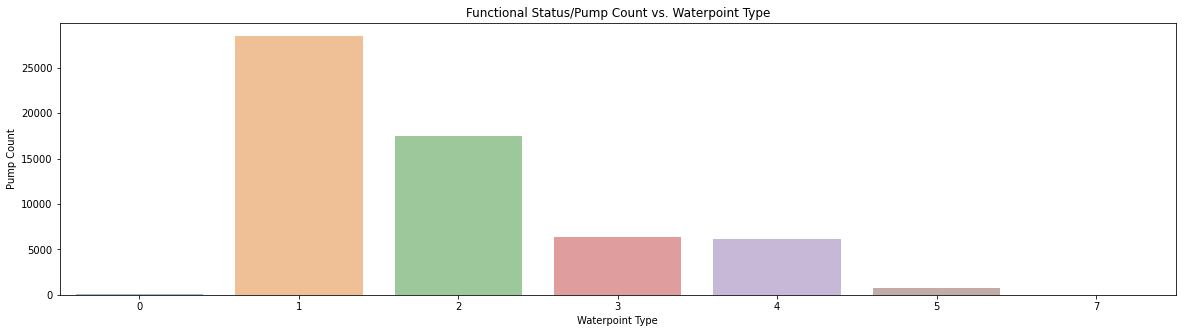

In [ ]:
pump_count = water['waterpoint_type'].value_counts()
pump_count = pump_count[:7,]
plt.figure(figsize=(20,5))
sns.barplot(pump_count.index, pump_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Waterpoint Type')
plt.ylabel('Pump Count')
plt.xlabel('Waterpoint Type')
plt.show()

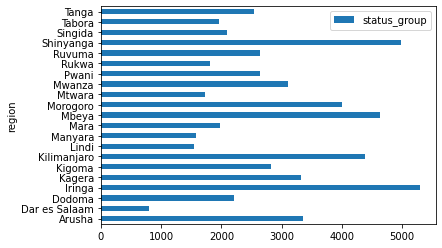

In [ ]:
# Let's create a count of Status Group values by Region with a Bar Chart
region = water.groupby('region')[['status_group']].count()
region.plot(kind='barh')


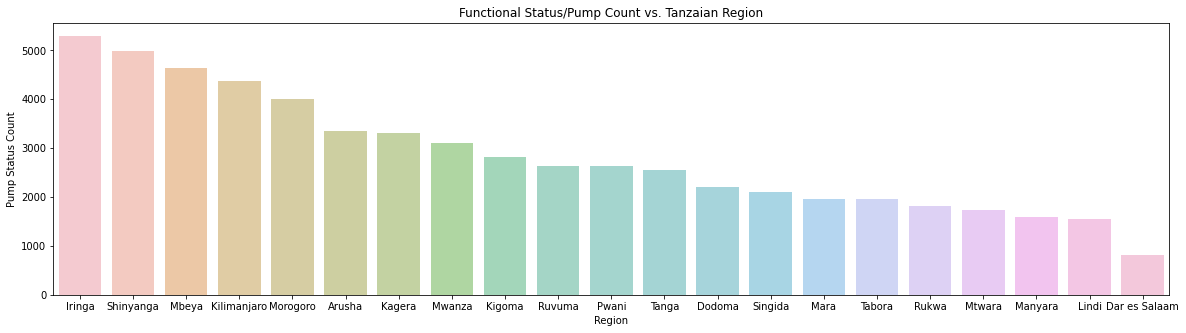

In [ ]:
region_count = water['region'].value_counts()
region_count = region_count[:21,]
plt.figure(figsize=(20,5))
sns.barplot(region_count.index, region_count.values, alpha=0.5)
plt.title('Functional Status/Pump Count vs. Tanzaian Region')
plt.ylabel('Pump Status Count')
plt.xlabel('Region')
plt.show()





In [ ]:
# Let's reverse the above chart to look at functional well status in the region
region = water.groupby('status_group')[['region']].count()
print(region)


              region
status_group        
0              22824
1              32259
2               4317


In [ ]:
# let's create a subset for our water project
# We will pull the most important categorical variables along with our target variable "status_group"
subset_water = water[['quantity', 'waterpoint_type', 'extraction_type_class', 'status_group']]
subset_water.head(10)

,quantity,waterpoint_type,extraction_type_class,status_group
0,1,1,1,1
1,2,1,1,1
2,1,4,1,1
3,0,4,5,0
4,3,1,1,1
5,1,4,5,1
6,1,2,2,0
7,1,2,2,0
8,3,2,2,0
9,1,2,2,1


In [ ]:
# Let's check for null values
subset_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   quantity               59400 non-null  int64 
 1   waterpoint_type        59400 non-null  int64 
 2   extraction_type_class  59400 non-null  object
 3   status_group           59400 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
# Let's change the Dtype on "extraction_type_class" to int64
subset_water['extraction_type_class'] = subset_water['extraction_type_class'].astype('int64')
print(subset_water.info())

ValueError: ignored

In [ ]:
# Spliting the data into Train and Test Sets and looking at the shape of the Train/Test Sets
X = subset_water.drop('status_group', axis=1)
y = subset_water['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print(X_train.shape)
print(X_test.shape)




(47520, 3)
(11880, 3)


In [ ]:
# Let's try Logistic Regression
LR = LogisticRegression(C=0.00008, random_state=123)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuarcy:', metrics.accuracy_score(y_pred, y_test))

## 5-Fold Cross Validation
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the 5-Fold Cross Validation Scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard Deviation: {}".format(round(np.std(cv_scores),4)))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt='d',
            xticklabels = ['Water', 'status_group'],
            yticklabels = ['Water', 'status_group'])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix - Logistic Regression");


ValueError: ignored